Task 5 - Calculate the nr of purchases of each product during every day and every hour in each shop. Make a table with a product sold in that day in particular shop as rows (one row for every day) and time by hour as columns; In each cell a nr of purchases in that hour. Draw a heatmap version of the sales data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import seaborn as sns; sns.set(color_codes=True)

In [9]:
sales = pd.read_csv("https://courses.cs.ut.ee/MTAT.03.183/2016_spring/uploads/Main/product_time_shop.txt",sep=";")

In [10]:
temp = sales.copy()
# Convert times to hour format
temp.time = sales.time//100

In [11]:
# Find the weekday from the dates
dayOfWeek = {0:'0-Monday',1:'1-Tuesday',2:'2-Wednesday',3:'3-Thursday',4:'4-Friday',5:'5-Saturday',6:'6-Sunday'}

In [12]:
temp['weekday']=pd.to_datetime(temp['date'],format='%Y%m%d').dt.weekday.map(dayOfWeek)

In [14]:
# Rearrange the data and aggregate by taking a mean of number of sales in weekday
temp = temp.groupby(["product","weekday","date","time"]).count().unstack(level=-1).mean(0,level=['product','weekday'])

In [16]:
temp = temp['shop_id']

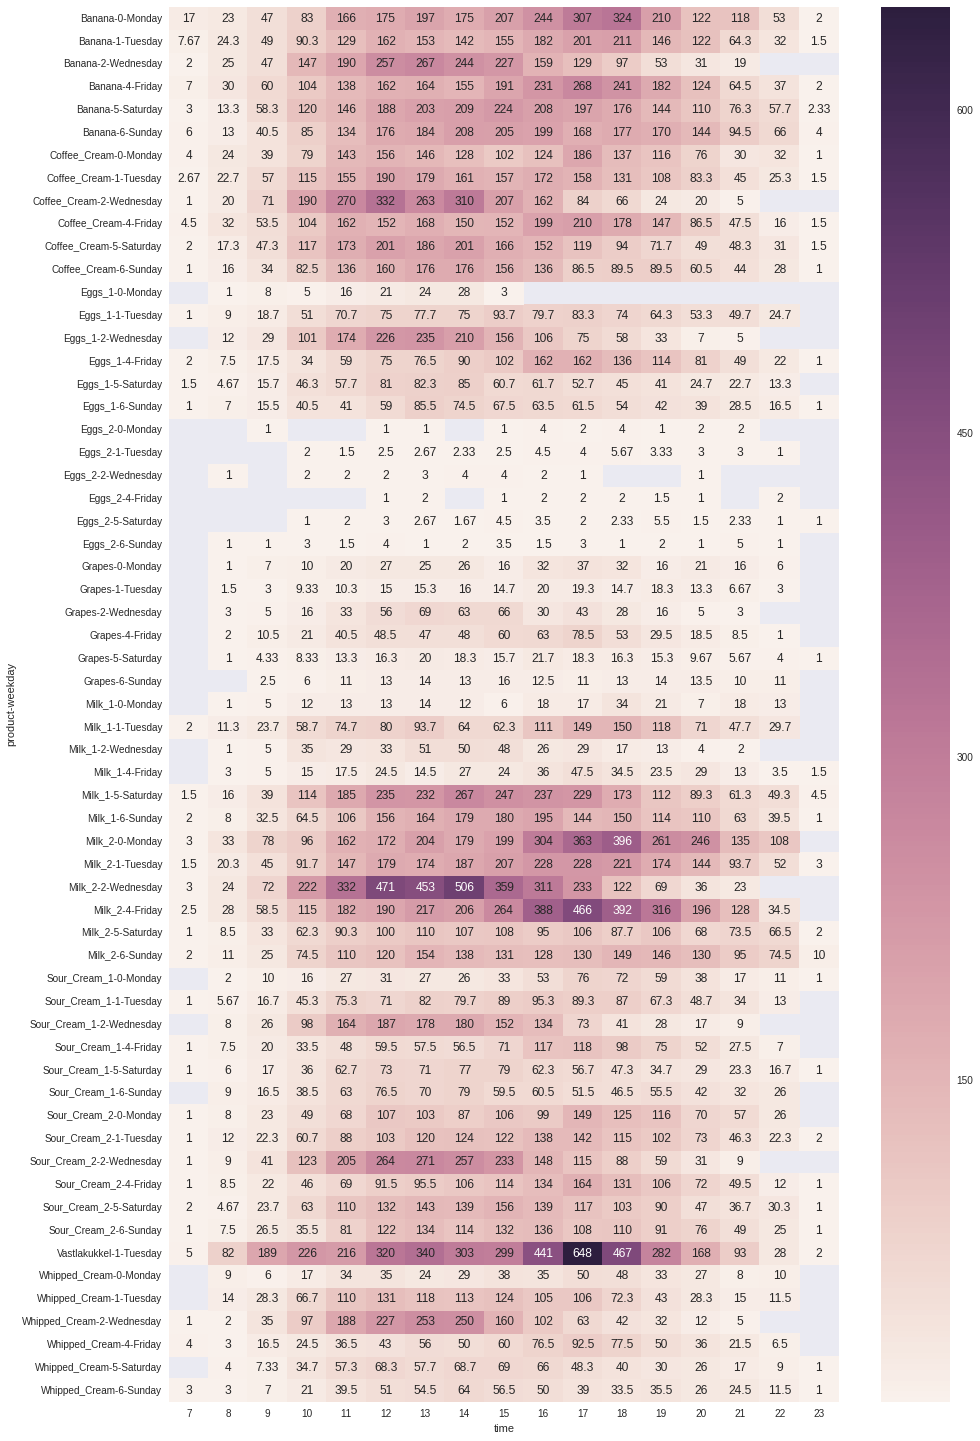

In [18]:
# Plot heatmap - aggregate by weekdays
fig, ax = plt.subplots(figsize = (15,25))
sns.heatmap(ax = ax, data = temp, annot=True, fmt=".3g");

In [21]:
# Plot heatmap - aggregate by dates
temp = sales.copy()
temp.time = sales.time//100

In [23]:
temp = temp.groupby(["product","date","time"]).count().unstack(level=-1)

In [24]:
temp

shop_id                                              \
time                        7   8    9    10   11   12   13   14   15   16   
product       date                                                           
Banana        20140104       2   5   33   47   95  122  168  195  212  203   
              20140119       3   7   23   55  109  162  178  194  186  222   
              20140208       4   8   44  119  146  183  206  208  224  190   
              20140304       1  25   57   94  138  163  170  154  158  209   
              20140407      17  23   47   83  166  175  197  175  207  244   
              20140415       8  35   56  100  125  177  164  122  130  191   
              20140601       9  19   58  115  160  190  190  223  224  176   
              20140607     NaN  27   98  195  198  259  234  223  235  230   
              20141024       6  19   37   81   86  123  143  120  138  181   
              20141031       8  41   83  127  190  202  184  190  244  281   
              20141223      14  13   34   77  125  146  125  149  177  145   
              20141231       2  25   47  147  190  257  267  244  227  159   
Coffee_Cream  20140104       2   5   31   99  171  189  209  219  201  191   
              20140119       1  12   20   68  122  186  202  200  188  174   
              20140208       1  10   51  108  172  229  194  243  184  156   
              20140304       4  19   50   91   86  128  105  102  113  123   
              20140407       4  24   39   79  143  156  146  128  102  124   
              20140415       1  24   55   78  129  151  134  101  125  135   
              20140601       1  20   48   97  149  133  151  152  123   98   
              20140607       3  37   60  143  175  186  155  142  112  108   
              20141024       8  21   53   96  160  140  167  158  157  200   
              20141031       1  43   54  112  163  165  168  141  147  198   
              20141223       3  25   66  176  249  292  297  281  234  257   
              20141231       1  20   71  190  270  332  263  310  207  162   
Eggs_1        20140104       2   4    9   47   58  111  105   95   77   64   
              20140119     NaN   4    9   25   26   50   73   54   72   70   
              20140208     NaN   2   12   30   37   60   49   60   55   57   
              20140304     NaN  15   26   39   53   71   51   46   52   60   
              20140407     NaN   1    8    5   16   21   24   28    3  NaN   
              20140415       1   7   12   31   32   42   29   39   38   52   
...                        ...  ..  ...  ...  ...  ...  ...  ...  ...  ...   
Sour_Cream_1  20140607       1  11   37   66  104   98   99  106  100   80   
              20141024       1   5   23   27   44   65   70   69   72  112   
              20141031       1  10   17   40   52   54   45   44   70  122   
              20141223       1   8   30   99  163  135  162  180  178  172   
              20141231     NaN   8   26   98  164  187  178  180  152  134   
Sour_Cream_2  20140104     NaN   1   20   47  101  115  140  159  159  148   
              20140119     NaN   7   33   46   93  177  179  142  168  182   
              20140208       3   5   32   81  145  185  166  175  211  198   
              20140304     NaN  12   21   52   64   84   73   70   68  126   
              20140407       1   8   23   49   68  107  103   87  106   99   
              20140415     NaN  11    7   28   40   47   43   46   48   73   
              20140601       1   8   20   25   69   66   90   86   96   89   
              20140607       1   8   19   61   85   97  123   84   98   72   
              20141024       1  10   24   50   83   88  103  103  113  138   
              20141031       1   7   20   42   55   95   88  109  115  130   
              20141223       1  13   39  102  160  177  245  256  250  214   
              20141231       1   9   41  123  205  264  271  257  233  148   
Vastlakukkel  20140304       5  82  189  226 

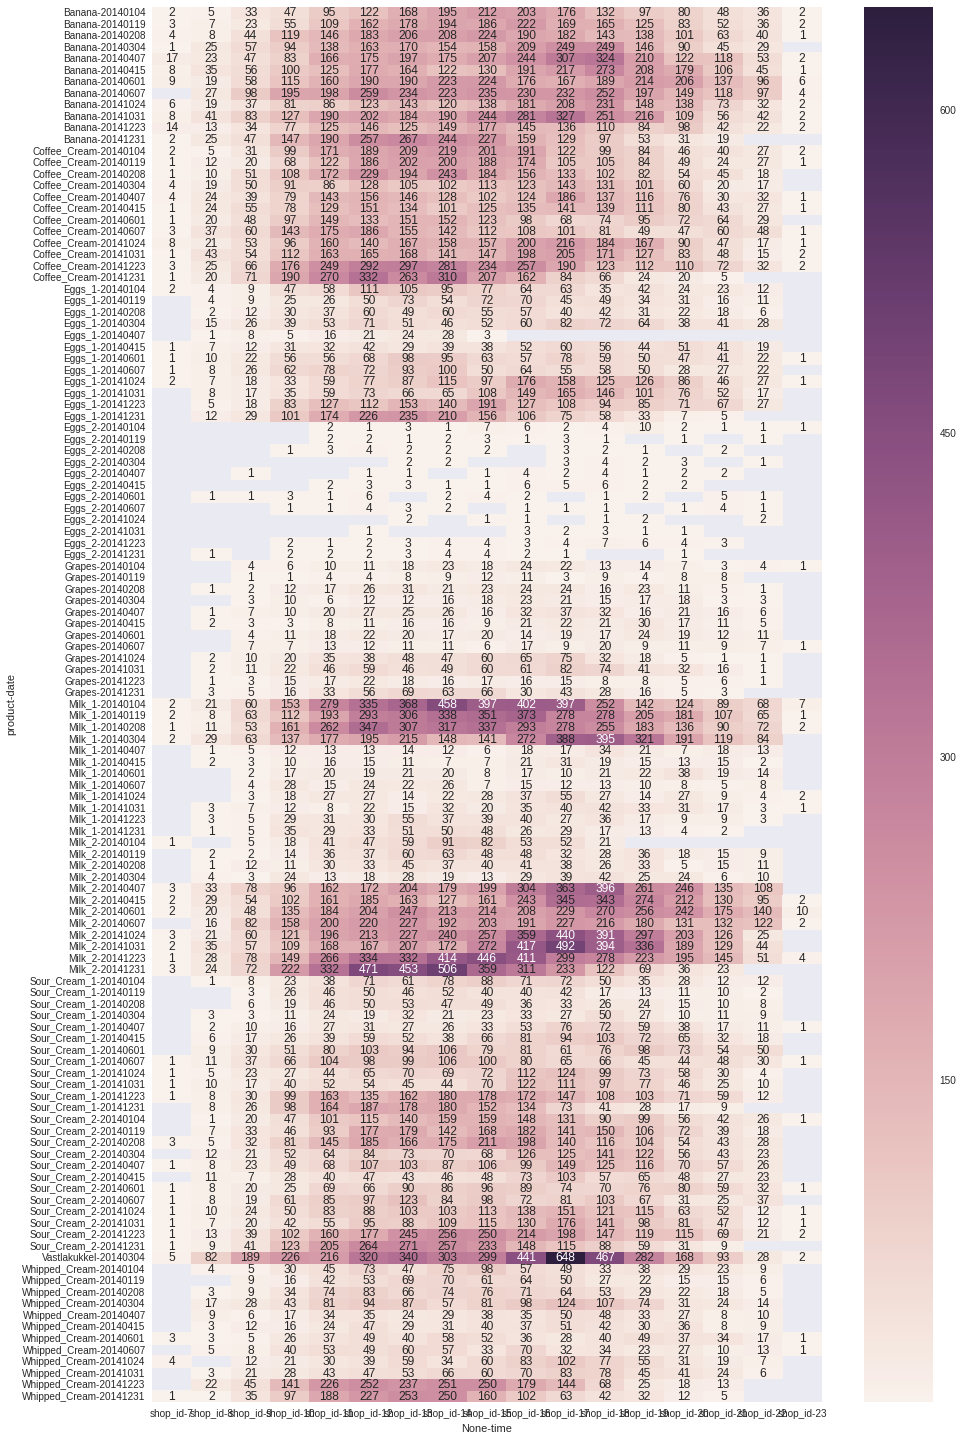

In [26]:
fig, ax = plt.subplots(figsize=(15,25))
sns.heatmap(ax = ax, data = temp, annot = True, fmt = ".3g")